In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


Final Data:
        age       bmi  children  expenses  sex_male  smoker_yes
0  0.021739  0.320755       0.0  16884.92         0           1
1  0.000000  0.479784       0.2   1725.55         1           0
2  0.217391  0.458221       0.6   4449.46         1           0
3  0.326087  0.180593       0.0  21984.47         1           0
4  0.304348  0.347709       0.0   3866.86         1           0
                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              1601.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:01:37   Log-Likelihood:                         -10854.
No. Observations:                1070   AIC:                                

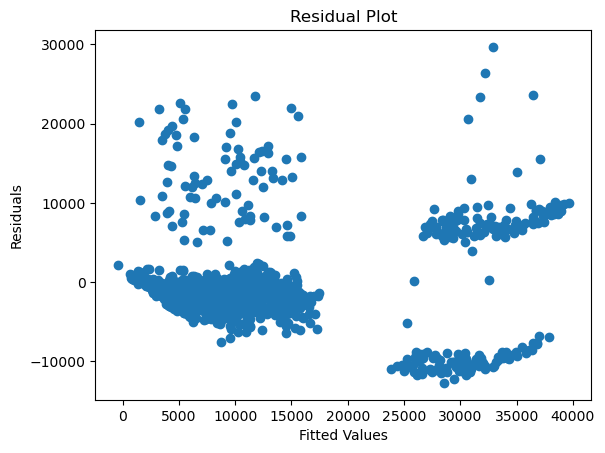

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

# Drop the 'egion' column
df = df.drop('region', axis=1)

# Create dummy variables for 'ex' and 'moker'
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
df[['sex_male', 'smoker_yes']] = df[['sex_male', 'smoker_yes']].astype(int)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the final data
print("Final Data:")
print(df.head())

# Split the data into training and testing sets
X = df.drop('expenses', axis=1)
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an OLS model to the training data
ols_model = sm.OLS(y_train, X_train).fit()

# Get the model summary
print(ols_model.summary())

# Test for multicollinearity using VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print("\nVIF Results:")
print(vif)

# Test for autocorrelation using Durbin-Watson test
dw_stat = durbin_watson(ols_model.resid)
print("\nDurbin-Watson Statistic:", dw_stat)

# Test for heteroscedasticity using White's test
y_pred = ols_model.fittedvalues
X_train_const = sm.add_constant(X_train)
_, p_value, _, _ = het_white(y_pred, X_train_const)
print("\nWhite's p-value:", p_value)

# Plot the residuals to visualize heteroscedasticity
plt.scatter(y_pred, y_train - y_pred)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Calculate the residuals and their squared values
residuals = ols_model.resid
residuals_variance = residuals ** 2

# Calculate the weights as the inverse of the residuals variance
weights = 1 / residuals_variance

# Create a weighted least squares model
from statsmodels.regression.linear_model import WLS
wls_model = WLS(y_train, X_train, weights=weights).fit()

# Print the summary of the weighted model
print(wls_model.summary())

                                 WLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   1.000
Model:                            WLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.597e+05
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:05:54   Log-Likelihood:                         -9767.9
No. Observations:                1070   AIC:                                  1.955e+04
Df Residuals:                    1065   BIC:                                  1.957e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

X_train_constant = sm.add_constant(X_train)

lagrange_multiplier, p_value, f_statistic, f_p_value = het_white(wls_residuals_variance, X_train_constant)

print("White's Test:")
print("Lagrange multiplier statistic:", lagrange_multiplier)
print("p-value:", p_value)

White's Test:
Lagrange multiplier statistic: 20.45244866303852
p-value: 0.30793130294325266


Final Data:
        age       bmi  children  expenses  sex_male  smoker_yes
0  0.021739  0.320755       0.0  16884.92         0           1
1  0.000000  0.479784       0.2   1725.55         1           0
2  0.217391  0.458221       0.6   4449.46         1           0
3  0.326087  0.180593       0.0  21984.47         1           0
4  0.304348  0.347709       0.0   3866.86         1           0
                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              1601.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:34:36   Log-Likelihood:                         -10854.
No. Observations:                1070   AIC:                                

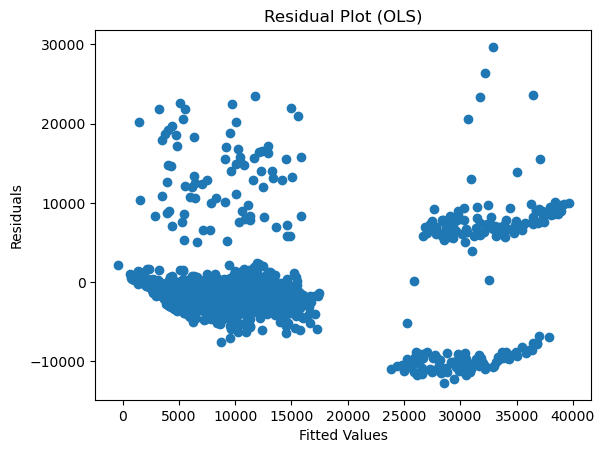

                                 WLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   1.000
Model:                            WLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.597e+05
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:34:36   Log-Likelihood:                         -9767.9
No. Observations:                1070   AIC:                                  1.955e+04
Df Residuals:                    1065   BIC:                                  1.957e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

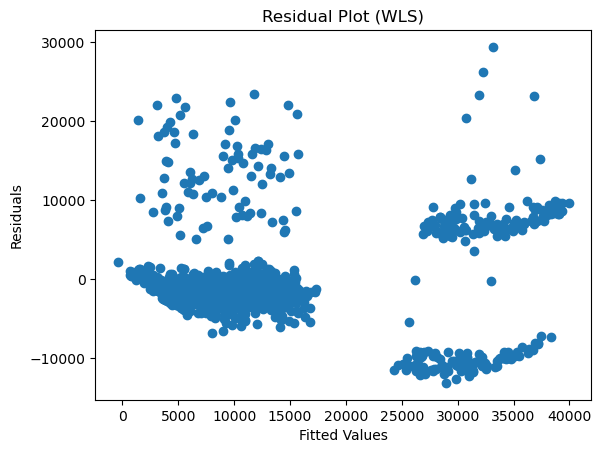


White's p-value (WLS): 1.7630203711159536e-20
Heteroscedasticity detected in WLS model!

R-squared (OLS): 0.8825962905414384
R-squared (WLS): 0.9996195814512406


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

# Drop the 'egion' column
df = df.drop('region', axis=1)

# Create dummy variables for 'ex' and 'moker'
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
df[['sex_male', 'smoker_yes']] = df[['sex_male', 'smoker_yes']].astype(int)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the final data
print("Final Data:")
print(df.head())

# Split the data into training and testing sets
X = df.drop('expenses', axis=1)
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an OLS model to the training data
ols_model = sm.OLS(y_train, X_train).fit()

# Get the model summary
print(ols_model.summary())

# Test for multicollinearity using VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print("\nVIF Results:")
print(vif)

# Test for autocorrelation using Durbin-Watson test
dw_stat = durbin_watson(ols_model.resid)
print("\nDurbin-Watson Statistic:", dw_stat)
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Autocorrelation detected!")
else:
    print("No autocorrelation detected.")

# Test for heteroscedasticity using White's test
y_pred = ols_model.fittedvalues
X_train_const = sm.add_constant(X_train)
_, p_value, _, _ = het_white(y_pred, X_train_const)
print("\nWhite's p-value:", p_value)
if p_value < 0.05:
    print("Heteroscedasticity detected!")
else:
    print("No heteroscedasticity detected.")

# Plot the residuals to visualize heteroscedasticity
plt.scatter(y_pred, y_train - y_pred)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (OLS)")
plt.show()

# Calculate the residuals and their squared values
residuals = ols_model.resid
residuals_variance = residuals ** 2

# Calculate the weights as the inverse of the residuals variance
weights = 1 / residuals_variance

# Create a weighted least squares model
wls_model = sm.WLS(y_train, X_train, weights=weights).fit()

# Print the summary of the weighted model
print(wls_model.summary())

# Plot the residuals from the WLS model
plt.scatter(wls_model.fittedvalues, wls_model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (WLS)")
plt.show()

# Perform White's test on the WLS residuals
_, p_value, _, _ = het_white(wls_model.resid, sm.add_constant(X_train))
print("\nWhite's p-value (WLS):", p_value)
if p_value < 0.05:
    print("Heteroscedasticity detected in WLS model!")
else:
    print("No heteroscedasticity detected in WLS model.")

# Compare the R-squared values
print("\nR-squared (OLS):", ols_model.rsquared)
print("R-squared (WLS):", wls_model.rsquared)

Final Data:
        age       bmi  children  expenses  sex_male  smoker_yes
0  0.021739  0.320755       0.0  16884.92         0           1
1  0.000000  0.479784       0.2   1725.55         1           0
2  0.217391  0.458221       0.6   4449.46         1           0
3  0.326087  0.180593       0.0  21984.47         1           0
4  0.304348  0.347709       0.0   3866.86         1           0
                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              1601.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:42:55   Log-Likelihood:                         -10854.
No. Observations:                1070   AIC:                                

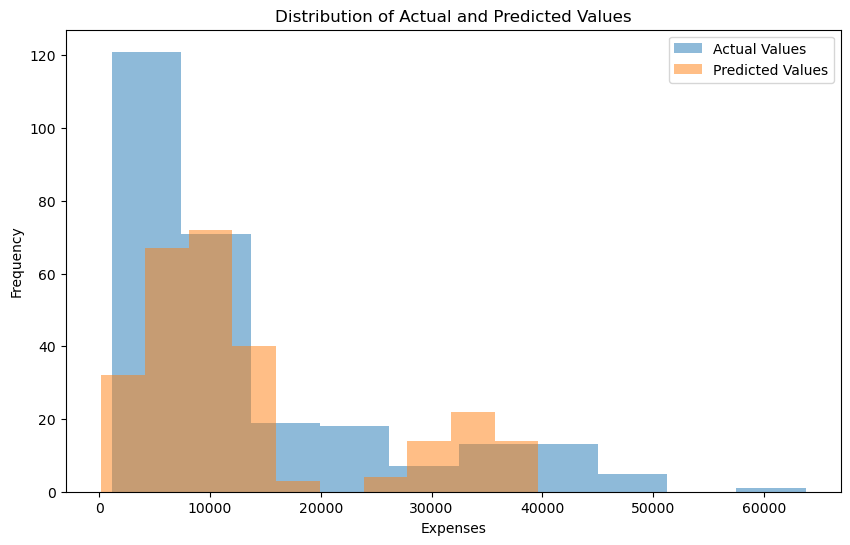

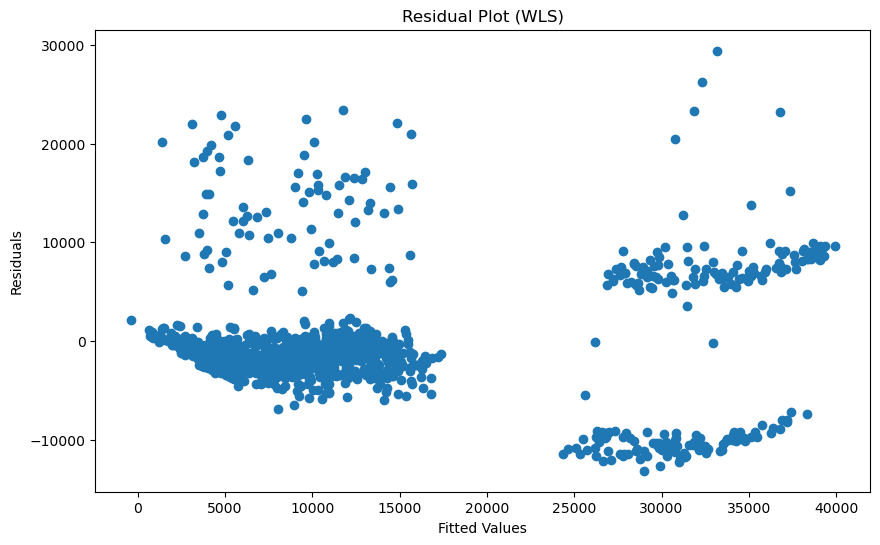

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the data
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

# Drop the 'region' column
df = df.drop('region', axis=1)

# Create dummy variables for 'sex' and 'moker'
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
df[['sex_male', 'smoker_yes']] = df[['sex_male', 'smoker_yes']].astype(int)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the final data
print("Final Data:")
print(df.head())

# Split the data into training and testing sets
X = df.drop('expenses', axis=1)
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an OLS model to the training data
ols_model = sm.OLS(y_train, X_train).fit()

# Get the model summary
print(ols_model.summary())

# Test for multicollinearity using VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print("\nVIF Results:")
print(vif)

# Test for autocorrelation using Durbin-Watson test
dw_stat = durbin_watson(ols_model.resid)
print("\nDurbin-Watson Statistic:", dw_stat)
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Autocorrelation detected!")
else:
    print("No autocorrelation detected.")

# Test for heteroscedasticity using White's test
y_pred = ols_model.fittedvalues
X_train_const = sm.add_constant(X_train)
_, p_value, _, _ = het_white(y_pred, X_train_const)
print("\nWhite's p-value:", p_value)
if p_value < 0.05:
    print("Heteroscedasticity detected!")
else:
    print("No heteroscedasticity detected.")

# Calculate the residuals and their squared values
residuals = ols_model.resid
residuals_variance = residuals ** 2

# Calculate the weights as the inverse of the residuals variance
weights = 1 / residuals_variance

# Create a weighted least squares model
wls_model = sm.WLS(y_train, X_train, weights=weights).fit()

# Print the summary of the weighted model
print(wls_model.summary())

# Make predictions on the test set using the WLS model
y_pred_wls = wls_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_wls)
r2 = r2_score(y_test, y_pred_wls)
mae = mean_absolute_error(y_test, y_pred_wls)
print("\nPerformance Metrics (WLS):")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot the distribution of actual and predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, alpha=0.5, label='Actual Values')
plt.hist(y_pred_wls, alpha=0.5, label='Predicted Values')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()
plt.show()

# Plot the residuals from the WLS model
plt.figure(figsize=(10, 6))
plt.scatter(wls_model.fittedvalues, wls_model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (WLS)")
plt.show()

Final Data:
        age       bmi  children  expenses  sex_male  smoker_yes
0  0.021739  0.320755       0.0  16884.92         0           1
1  0.000000  0.479784       0.2   1725.55         1           0
2  0.217391  0.458221       0.6   4449.46         1           0
3  0.326087  0.180593       0.0  21984.47         1           0
4  0.304348  0.347709       0.0   3866.86         1           0
                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              1601.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:53:42   Log-Likelihood:                         -10854.
No. Observations:                1070   AIC:                                

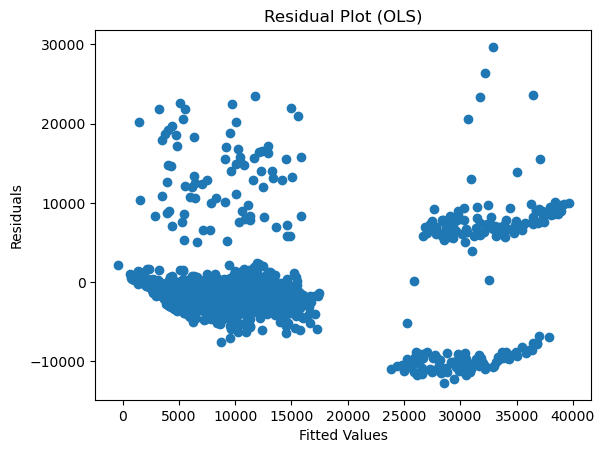

                                 WLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.969
Model:                            WLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              6664.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:53:42   Log-Likelihood:                         -10069.
No. Observations:                1070   AIC:                                  2.015e+04
Df Residuals:                    1065   BIC:                                  2.017e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

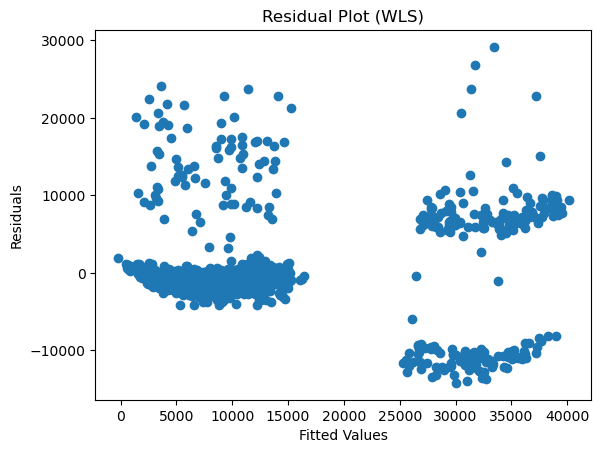


White's p-value (WLS): 1.9057396179544302e-23
Heteroscedasticity detected in WLS model!

R-squared (OLS): 0.8825962905414384
R-squared (WLS): 0.9690266217137824

Performance Metrics (WLS):
Mean Squared Error (MSE): 34740300.09971888
R-squared (R2): 0.7762281258872885
Mean Absolute Error (MAE): 3693.72431653658


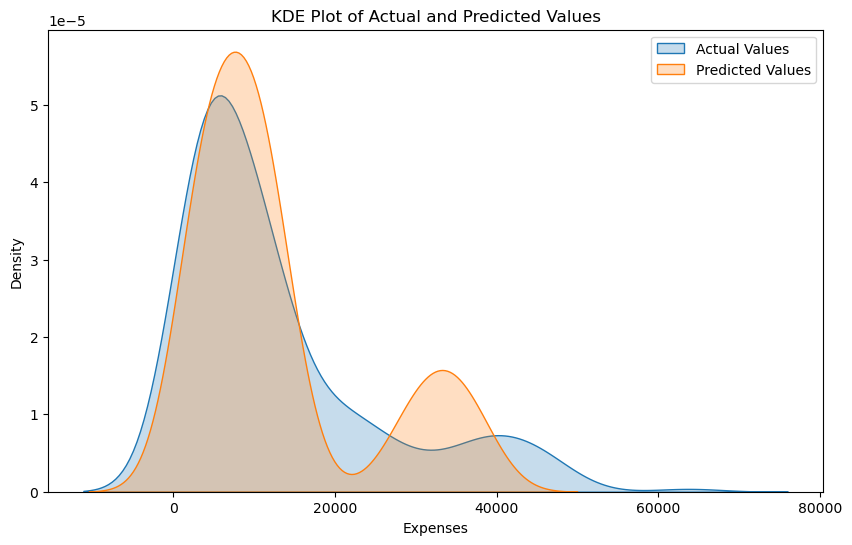

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

# Drop the 'egion' column
df = df.drop('region', axis=1)

# Create dummy variables for 'ex' and 'moker'
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
df[['sex_male', 'smoker_yes']] = df[['sex_male', 'smoker_yes']].astype(int)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the final data
print("Final Data:")
print(df.head())

# Split the data into training and testing sets
X = df.drop('expenses', axis=1)
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an OLS model to the training data
ols_model = sm.OLS(y_train, X_train).fit()

# Get the model summary
print(ols_model.summary())

# Test for multicollinearity using VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print("\nVIF Results:")
print(vif)

# Test for autocorrelation using Durbin-Watson test
dw_stat = durbin_watson(ols_model.resid)
print("\nDurbin-Watson Statistic:", dw_stat)
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Autocorrelation detected!")
else:
    print("No autocorrelation detected.")

# Test for heteroscedasticity using White's test
y_pred = ols_model.fittedvalues
X_train_const = sm.add_constant(X_train)
_, p_value, _, _ = het_white(y_pred, X_train_const)
print("\nWhite's p-value:", p_value)
if p_value < 0.05:
    print("Heteroscedasticity detected!")
else:
    print("No heteroscedasticity detected.")

# Plot the residuals to visualize heteroscedasticity
plt.scatter(y_pred, y_train - y_pred)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (OLS)")
plt.show()

# Calculate the residuals and their squared values
residuals = ols_model.resid
residuals_variance = residuals ** 2

# Calculate the weights as the inverse of the residuals variance
weights = 1 / np.sqrt(residuals_variance)  # Changed to sqrt of residuals variance
# weights = 1 / np.log(residuals_variance)
# weights = 1 / (residuals_variance ** 0.25)

# Create a weighted least squares model
wls_model = sm.WLS(y_train, X_train, weights=weights).fit()

# Print the summary of the weighted model
print(wls_model.summary())

# Plot the residuals from the WLS model
plt.scatter(wls_model.fittedvalues, wls_model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (WLS)")
plt.show()

# Perform White's test on the WLS residuals
_, p_value, _, _ = het_white(wls_model.resid, sm.add_constant(X_train))
print("\nWhite's p-value (WLS):", p_value)
if p_value < 0.05:
    print("Heteroscedasticity detected in WLS model!")
else:
    print("No heteroscedasticity detected in WLS model.")

# Compare the R-squared values
print("\nR-squared (OLS):", ols_model.rsquared)
print("R-squared (WLS):", wls_model.rsquared)

# Make predictions on the test set using the WLS model
y_pred_wls = wls_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_wls)
r2 = r2_score(y_test, y_pred_wls)
mae = mean_absolute_error(y_test, y_pred_wls)
print("\nPerformance Metrics (WLS):")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot the KDE of actual and predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, shade=True, label='Actual Values')
sns.kdeplot(y_pred_wls, shade=True, label='Predicted Values')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.title('KDE Plot of Actual and Predicted Values')
plt.legend()
plt.show()

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

# Drop the 'egion' column
df = df.drop('region', axis=1)

# Create dummy variables for 'ex' and 'moker'
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
df[['sex_male', 'smoker_yes']] = df[['sex_male', 'smoker_yes']].astype(int)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the final data
print("Final Data:")
print(df.head())

# Define X and y
X = df.drop('expenses', axis=1)
y = df['expenses']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
mse_list = []
r2_list = []
mae_list = []

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Add constant term for intercept
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Fit an OLS model to the training data
    ols_model = sm.OLS(y_train, X_train_const).fit()

    # Calculate the residuals and their squared values
    residuals = ols_model.resid
    residuals_variance = residuals ** 2

    # Create a weighted least squares model
    weights = 1 / np.sqrt(residuals_variance)
    wls_model = sm.WLS(y_train, X_train_const, weights=weights).fit(cov_type='HC3')

    # Make predictions on the test set using the WLS model
    y_pred_wls = wls_model.predict(X_test_const)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred_wls)
    r2 = r2_score(y_test, y_pred_wls)
    mae = mean_absolute_error(y_test, y_pred_wls)

    # Append metrics to lists
    mse_list.append(mse)
    r2_list.append(r2)
    mae_list.append(mae)

# Calculate and print average performance metrics
print("\nCross-Validation Performance Metrics (WLS):")
print("Average Mean Squared Error (MSE):", np.mean(mse_list))
print("Average R-squared (R2):", np.mean(r2_list))
print("Average Mean Absolute Error (MAE):", np.mean(mae_list))

Final Data:
        age       bmi  children  expenses  sex_male  smoker_yes
0  0.021739  0.320755       0.0  16884.92         0           1
1  0.000000  0.479784       0.2   1725.55         1           0
2  0.217391  0.458221       0.6   4449.46         1           0
3  0.326087  0.180593       0.0  21984.47         1           0
4  0.304348  0.347709       0.0   3866.86         1           0

Cross-Validation Performance Metrics (WLS):
Average Mean Squared Error (MSE): 38551716.42150164
Average R-squared (R2): 0.7285040518913007
Average Mean Absolute Error (MAE): 3797.486574999179


In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

# Drop the 'egion' column
df = df.drop('region', axis=1)

# Create dummy variables for 'ex' and 'moker'
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
df[['sex_male', 'smoker_yes']] = df[['sex_male', 'smoker_yes']].astype(int)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the final data
print("Final Data:")
print(df.head())

# Define X and y
X = df.drop('expenses', axis=1)
y = df['expenses']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
mse_list = []
r2_list = []
mae_list = []

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Add constant term for intercept
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Fit an OLS model to the training data
    ols_model = sm.OLS(y_train, X_train_const).fit()

    # Calculate the residuals and their squared values
    residuals = ols_model.resid
    residuals_variance = residuals ** 2

    # Create a weighted least squares model
    weights = 1 / np.sqrt(residuals_variance)
    wls_model = sm.WLS(y_train, X_train_const, weights=weights).fit(cov_type='HC3')

    # Make predictions on the test set using the WLS model
    y_pred_wls = wls_model.predict(X_test_const)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred_wls)
    r2 = r2_score(y_test, y_pred_wls)
    mae = mean_absolute_error(y_test, y_pred_wls)

    # Append metrics to lists
    mse_list.append(mse)
    r2_list.append(r2)
    mae_list.append(mae)

# Calculate and print average performance metrics
print("\nCross-Validation Performance Metrics (WLS):")
print("Average Mean Squared Error (MSE):", np.mean(mse_list))
print("Average R-squared (R2):", np.mean(r2_list))
print("Average Mean Absolute Error (MAE):", np.mean(mae_list))

Final Data:
        age       bmi  children  expenses  sex_male  smoker_yes
0  0.021739  0.320755       0.0  16884.92         0           1
1  0.000000  0.479784       0.2   1725.55         1           0
2  0.217391  0.458221       0.6   4449.46         1           0
3  0.326087  0.180593       0.0  21984.47         1           0
4  0.304348  0.347709       0.0   3866.86         1           0

Cross-Validation Performance Metrics (WLS):
Average Mean Squared Error (MSE): 38551716.42150164
Average R-squared (R2): 0.7285040518913007
Average Mean Absolute Error (MAE): 3797.486574999179


Final Data:
        age       bmi  children  expenses  sex_male  smoker_yes
0  0.021739  0.320755       0.0  16884.92         0           1
1  0.000000  0.479784       0.2   1725.55         1           0
2  0.217391  0.458221       0.6   4449.46         1           0
3  0.326087  0.180593       0.0  21984.47         1           0
4  0.304348  0.347709       0.0   3866.86         1           0
                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     609.2
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          3.51e-309
Time:                        11:48:39   Log-Likelihood:                -10847.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1064   BIC:       

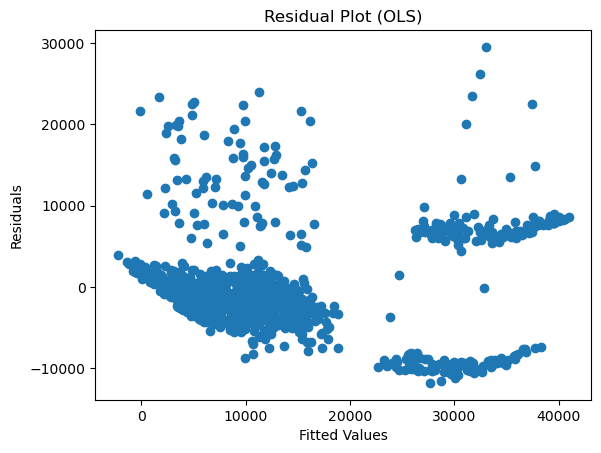

                            WLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.927
Model:                            WLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1780.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:48:40   Log-Likelihood:                -10067.
No. Observations:                1070   AIC:                         2.015e+04
Df Residuals:                    1064   BIC:                         2.018e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -568.8481    264.828     -2.148      0.0

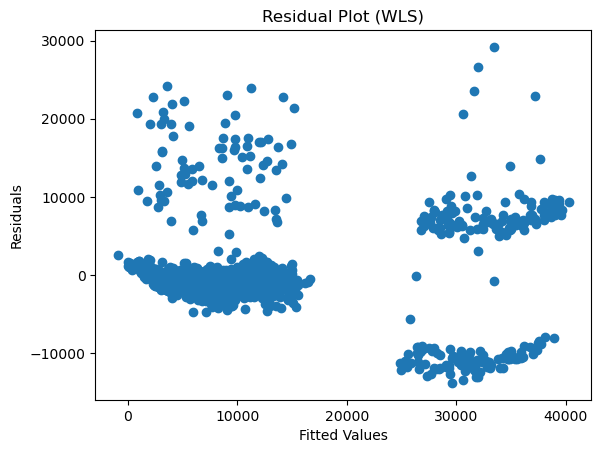


White's p-value (WLS): 2.131921374061132e-20
Heteroscedasticity detected in WLS model!

R-squared (OLS): 0.7411142616557147
R-squared (WLS): 0.9274730379705197

Performance Metrics (WLS):
Mean Squared Error (MSE): 34436013.30161647
R-squared (R2): 0.7781881212495532
Mean Absolute Error (MAE): 3718.8039242372


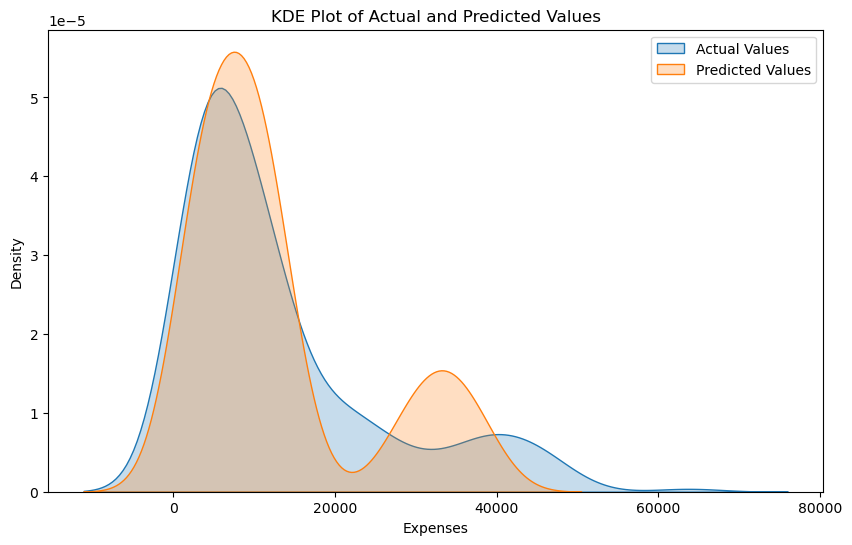

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

# Drop the 'region' column
df = df.drop('region', axis=1)

# Create dummy variables for 'sex' and 'smoker'
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
df[['sex_male', 'smoker_yes']] = df[['sex_male', 'smoker_yes']].astype(int)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the final data
print("Final Data:")
print(df.head())

# Split the data into training and testing sets
X = df.drop('expenses', axis=1)
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term for intercept
X_train_const = sm.add_constant(X_train)

# Fit an OLS model to the training data
ols_model = sm.OLS(y_train, X_train_const).fit()

# Get the model summary
print(ols_model.summary())

# Test for multicollinearity using VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif["features"] = X_train_const.columns
print("\nVIF Results:")
print(vif)

# Test for autocorrelation using Durbin-Watson test
dw_stat = durbin_watson(ols_model.resid)
print("\nDurbin-Watson Statistic:", dw_stat)
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Autocorrelation detected!")
else:
    print("No autocorrelation detected.")

# Test for heteroscedasticity using White's test
_, p_value, _, _ = het_white(ols_model.resid, X_train_const)
print("\nWhite's p-value:", p_value)
if p_value < 0.05:
    print("Heteroscedasticity detected!")
else:
    print("No heteroscedasticity detected.")

# Plot the residuals to visualize heteroscedasticity
plt.scatter(ols_model.fittedvalues, ols_model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (OLS)")
plt.show()

# Calculate the residuals and their squared values
residuals = ols_model.resid
residuals_variance = residuals ** 2

# Create a weighted least squares model
weights = 1 / np.sqrt(residuals_variance)
wls_model = sm.WLS(y_train, X_train_const, weights=weights).fit(cov_type='HC3')

# Print the summary of the weighted model with robust standard errors
print(wls_model.summary())

# Plot the residuals from the WLS model
plt.scatter(wls_model.fittedvalues, wls_model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (WLS)")
plt.show()

# Perform White's test on the WLS residuals
_, p_value_wls, _, _ = het_white(wls_model.resid, X_train_const)
print("\nWhite's p-value (WLS):", p_value_wls)
if p_value_wls < 0.05:
    print("Heteroscedasticity detected in WLS model!")
else:
    print("No heteroscedasticity detected in WLS model.")

# Compare the R-squared values
print("\nR-squared (OLS):", ols_model.rsquared)
print("R-squared (WLS):", wls_model.rsquared)

# Make predictions on the test set using the WLS model
X_test_const = sm.add_constant(X_test)
y_pred_wls = wls_model.predict(X_test_const)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_wls)
r2 = r2_score(y_test, y_pred_wls)
mae = mean_absolute_error(y_test, y_pred_wls)
print("\nPerformance Metrics (WLS):")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot the KDE of actual and predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, shade=True, label='Actual Values')
sns.kdeplot(y_pred_wls, shade=True, label='Predicted Values')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.title('KDE Plot of Actual and Predicted Values')
plt.legend()
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:/Users/Dell/Downloads/insurance.csv")

# Drop the 'region' column
df = df.drop('region', axis=1)

# Create dummy variables for 'sex' and 'smoker'
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Convert boolean columns to integers
df[['sex_male', 'smoker_yes']] = df[['sex_male', 'smoker_yes']].astype(int)

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the final data
print("Final Data:")
print(df.head())

# Define X and y
X = df.drop('expenses', axis=1)
y = df['expenses']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
mse_list = []
r2_list = []
mae_list = []

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Add constant term for intercept
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Fit an OLS model to the training data
    ols_model = sm.OLS(y_train, X_train_const).fit()

    # Calculate the residuals and their squared values
    residuals = ols_model.resid
    residuals_variance = residuals ** 2

    # Create a weighted least squares model
    weights = 1 / np.sqrt(residuals_variance)
    wls_model = sm.WLS(y_train, X_train_const, weights=weights).fit(cov_type='HC3')

    # Make predictions on the test set using the WLS model
    y_pred_wls = wls_model.predict(X_test_const)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred_wls)
    r2 = r2_score(y_test, y_pred_wls)
    mae = mean_absolute_error(y_test, y_pred_wls)

    # Append metrics to lists
    mse_list.append(mse)
    r2_list.append(r2)
    mae_list.append(mae)

# Calculate and print average performance metrics
print("\nCross-Validation Performance Metrics (WLS):")
print("Average Mean Squared Error (MSE):", np.mean(mse_list))
print("Average R-squared (R2):", np.mean(r2_list))
print("Average Mean Absolute Error (MAE):", np.mean(mae_list))


Final Data:
        age       bmi  children  expenses  sex_male  smoker_yes
0  0.021739  0.320755       0.0  16884.92         0           1
1  0.000000  0.479784       0.2   1725.55         1           0
2  0.217391  0.458221       0.6   4449.46         1           0
3  0.326087  0.180593       0.0  21984.47         1           0
4  0.304348  0.347709       0.0   3866.86         1           0

Cross-Validation Performance Metrics (WLS):
Average Mean Squared Error (MSE): 38551716.42150164
Average R-squared (R2): 0.7285040518913007
Average Mean Absolute Error (MAE): 3797.486574999179


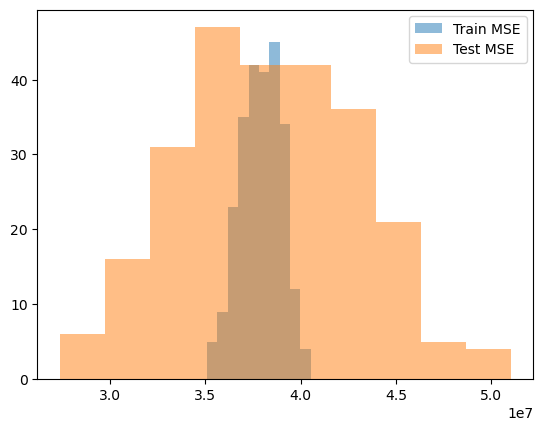

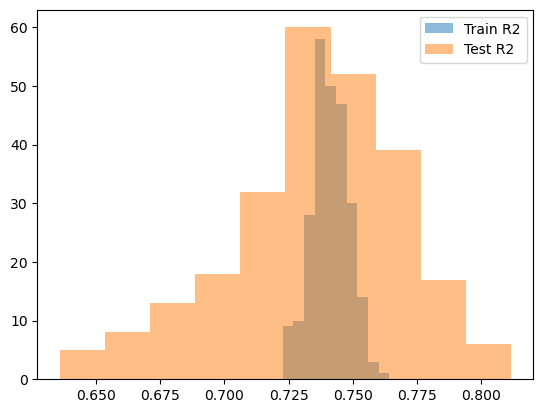

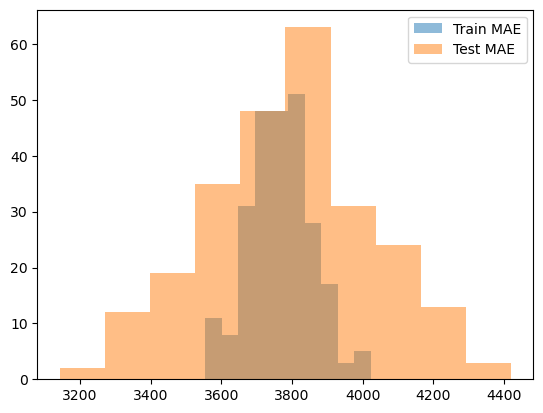

In [6]:
# Initialize lists to store metrics for 50 iterations
from sklearn.model_selection import KFold
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []
mae_train_list = []
mae_test_list = []

for _ in range(50):
    kf = KFold(n_splits=5, shuffle=True, random_state=np.random.randint(0, 100))
    mse_train_iter = []
    mse_test_iter = []
    r2_train_iter = []
    r2_test_iter = []
    mae_train_iter = []
    mae_test_iter = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Add constant term for intercept
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)

        # Fit an OLS model to the training data
        ols_model = sm.OLS(y_train, X_train_const).fit()

        # Calculate the residuals and their squared values
        residuals = ols_model.resid
        residuals_variance = residuals ** 2

        # Create a weighted least squares model
        weights = 1 / np.sqrt(residuals_variance)
        wls_model = sm.WLS(y_train, X_train_const, weights=weights).fit(cov_type='HC3')

        # Make predictions on the train and test sets using the WLS model
        y_pred_train_wls = wls_model.predict(X_train_const)
        y_pred_test_wls = wls_model.predict(X_test_const)

        # Calculate performance metrics for train and test sets
        mse_train = mean_squared_error(y_train, y_pred_train_wls)
        mse_test = mean_squared_error(y_test, y_pred_test_wls)
        r2_train = r2_score(y_train, y_pred_train_wls)
        r2_test = r2_score(y_test, y_pred_test_wls)
        mae_train = mean_absolute_error(y_train, y_pred_train_wls)
        mae_test = mean_absolute_error(y_test, y_pred_test_wls)

        # Append metrics to iteration lists
        mse_train_iter.append(mse_train)
        mse_test_iter.append(mse_test)
        r2_train_iter.append(r2_train)
        r2_test_iter.append(r2_test)
        mae_train_iter.append(mae_train)
        mae_test_iter.append(mae_test)

    # Append iteration lists to main lists
    mse_train_list.extend(mse_train_iter)
    mse_test_list.extend(mse_test_iter)
    r2_train_list.extend(r2_train_iter)
    r2_test_list.extend(r2_test_iter)
    mae_train_list.extend(mae_train_iter)
    mae_test_list.extend(mae_test_iter)

# Plot distributions of train and test errors
plt.hist(mse_train_list, alpha=0.5, label='Train MSE')
plt.hist(mse_test_list, alpha=0.5, label='Test MSE')
plt.legend()
plt.show()

plt.hist(r2_train_list, alpha=0.5, label='Train R2')
plt.hist(r2_test_list, alpha=0.5, label='Test R2')
plt.legend()
plt.show()

plt.hist(mae_train_list, alpha=0.5, label='Train MAE')
plt.hist(mae_test_list, alpha=0.5, label='Test MAE')
plt.legend()
plt.show()

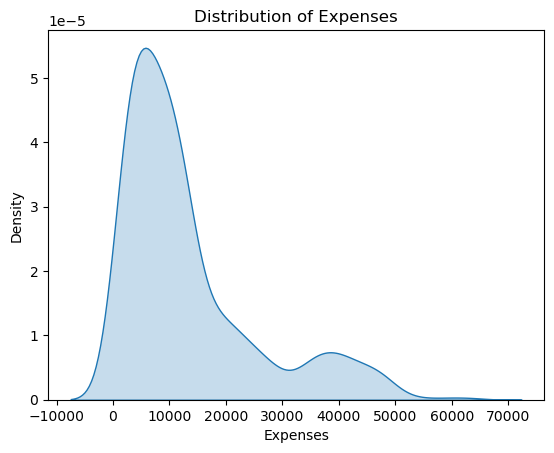

In [7]:
# Assuming 'expenses' is the column name for the expense values in the dataframe df
sns.kdeplot(df['expenses'], shade=True)

# Add a title and labels
plt.title('Distribution of Expenses')
plt.xlabel('Expenses')
plt.ylabel('Density')

# Show the plot
plt.show()


In [9]:
df.describe()


,age,bmi,children,expenses,sex_male,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395296,0.218984,13270.422414,0.505232,0.204783
std,0.305434,0.164377,0.241099,12110.011240,0.500160,0.403694
min,0.000000,0.000000,0.000000,1121.870000,0.000000,0.000000
25%,0.195652,0.277628,0.000000,4740.287500,0.000000,0.000000
50%,0.456522,0.388140,0.200000,9382.030000,1.000000,0.000000
75%,0.717391,0.504043,0.400000,16639.915000,1.000000,0.000000
max,1.000000,1.000000,1.000000,63770.430000,1.000000,1.000000


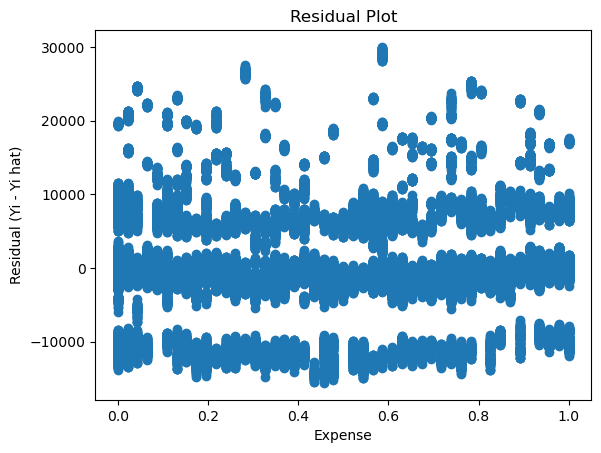

In [11]:
# Create lists to store the residuals and corresponding expense values
residuals_list = []
expenses_list = []

for _ in range(50):
    kf = KFold(n_splits=5, shuffle=True, random_state=np.random.randint(0, 100))
    residuals_iter = []
    expenses_iter = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Add constant term for intercept
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)

        # Fit an OLS model to the training data
        ols_model = sm.OLS(y_train, X_train_const).fit()

        # Calculate the residuals and their squared values
        residuals = ols_model.resid
        residuals_variance = residuals ** 2

        # Create a weighted least squares model
        weights = 1 / np.sqrt(residuals_variance)
        wls_model = sm.WLS(y_train, X_train_const, weights=weights).fit(cov_type='HC3')

        # Make predictions on the test set using the WLS model
        y_pred_test_wls = wls_model.predict(X_test_const)

        # Calculate residuals for test set
        residuals_test = y_test - y_pred_test_wls

        # Append residuals and corresponding expense values to iteration lists
        residuals_iter.extend(residuals_test)
        expenses_iter.extend(X_test.iloc[:, 0])

    # Append iteration lists to main lists
    residuals_list.extend(residuals_iter)
    expenses_list.extend(expenses_iter)

# Plot residuals against expense column
plt.scatter(expenses_list, residuals_list)
plt.xlabel('Expense')
plt.ylabel('Residual (Yi - Yi hat)')
plt.title('Residual Plot')
plt.show()